In [6]:
import pandas as pd
import numpy as np
import csv
import re

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import cv2
import json

import skimage.measure

import rasterio
from rasterio.features import shapes

import matplotlib.patches as mpatches
from shapely.geometry import Point, Polygon, shape, mapping
import shapely
import geopandas as gpd

from matplotlib.path import Path
import laspy
import open3d as o3d
import os

from skopt import BayesSearchCV
from sklearn.neighbors import LocalOutlierFactor


ModuleNotFoundError: No module named 'rasterio'

In [9]:
cols = ["file", "filepath", "points", "newPoints", "pct_kept_datapoints", "pct_lost_powerline", "params"]

with open('/home/frederik/data/results/results_small.txt', 'r') as f:
    lines = f.read()
lines = lines.split('\n')[:-1]


In [11]:
results = []
for line in lines:
    match = re.search("\{.*\}", line)
    start, end = match.span()
    params = line[start:end]
    data = line[:start-1].split(',')
    results.append(data+[params])

df = pd.DataFrame(results, columns=cols)

df['pct_lost_powerline'] = df['pct_lost_powerline'].astype(float)
df['pct_kept_datapoints'] = df['pct_kept_datapoints'].astype(float)
df['newPoints'] = df['newPoints'].astype(int)
df['points'] = df['points'].astype(int)


runs = [] 
for i in df['params'].unique():
    tmpDF = df[df['params'] == i]
    runs.append(tmpDF)


alpha = 0.50
best_score = 0
best_run = None

for run in runs:
    mean_kept = np.mean(run['pct_kept_datapoints'])
    mean_lost_powerline = np.mean(run['pct_lost_powerline']) 
    score = 1 - (1-alpha)*mean_kept - alpha*mean_lost_powerline
    
    if score > best_score:
        best_score = score
        best_run = run

print("Score:", best_score)
print("Points Kept:", np.mean(best_run['pct_kept_datapoints']))
print("Powerline Lost:", np.mean(best_run['pct_lost_powerline']))



Score: 0.8235844343326143
Points Kept: 0.2121128725823195
Powerline Lost: 0.14071825875245186


In [12]:
best_params = best_run.iloc[0].params.replace("'", '"')
best_params = json.loads(best_params)

In [13]:
best_params

{'canny_lower': 19,
 'canny_upper': 101,
 'cc_area': 1439,
 'closing_kernel_size': 1,
 'hough_lines_treshold': 50,
 'max_line_gap': 6,
 'meters_around_line': 10,
 'min_line_length': 12,
 'path': '/home/nxw500/data/',
 'simplify_tolerance': 8}

In [14]:
best_run

,file,filepath,points,newPoints,pct_kept_datapoints,pct_lost_powerline,params
1560,0,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,3305774,242179,0.073259,0.000499,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1561,1,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,3619031,1008891,0.278774,0.007690,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1562,2,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,6931084,1791235,0.258435,0.004733,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1563,3,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,3627987,673203,0.185558,0.020090,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1564,4,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,8897947,1789541,0.201118,0.032997,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1565,5,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,11446476,2304418,0.201321,0.070613,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1566,6,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,16966929,6107739,0.359979,0.045266,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1567,7,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,16146528,3937349,0.243851,0.002427,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1568,8,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,1643596,134850,0.082046,0.000065,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1569,9,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,6777427,3932999,0.580309,0.001792,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."


In [15]:
best_run.loc[1572].filepath

'/home/nxw500/data/LazFilesWithHeightRemoved/PUNKTSKY_00005_1km_6219_494_height_filtered.laz'

In [16]:
best_run

,file,filepath,points,newPoints,pct_kept_datapoints,pct_lost_powerline,params
1560,0,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,3305774,242179,0.073259,0.000499,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1561,1,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,3619031,1008891,0.278774,0.007690,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1562,2,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,6931084,1791235,0.258435,0.004733,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1563,3,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,3627987,673203,0.185558,0.020090,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1564,4,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,8897947,1789541,0.201118,0.032997,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1565,5,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,11446476,2304418,0.201321,0.070613,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1566,6,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,16966929,6107739,0.359979,0.045266,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1567,7,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,16146528,3937349,0.243851,0.002427,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1568,8,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,1643596,134850,0.082046,0.000065,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."
1569,9,/home/nxw500/data/LazFilesWithHeightRemoved/PU...,6777427,3932999,0.580309,0.001792,"{'canny_lower': 19, 'canny_upper': 101, 'cc_ar..."


In [17]:
best_params

{'canny_lower': 19,
 'canny_upper': 101,
 'cc_area': 1439,
 'closing_kernel_size': 1,
 'hough_lines_treshold': 50,
 'max_line_gap': 6,
 'meters_around_line': 10,
 'min_line_length': 12,
 'path': '/home/nxw500/data/',
 'simplify_tolerance': 8}

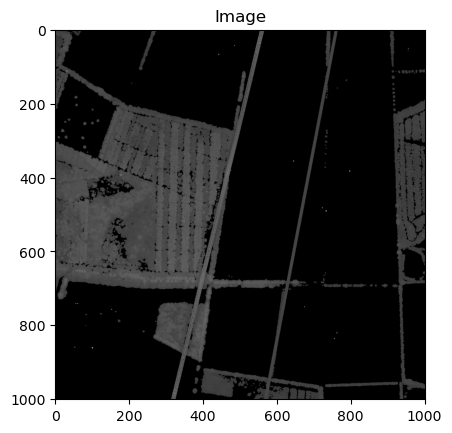

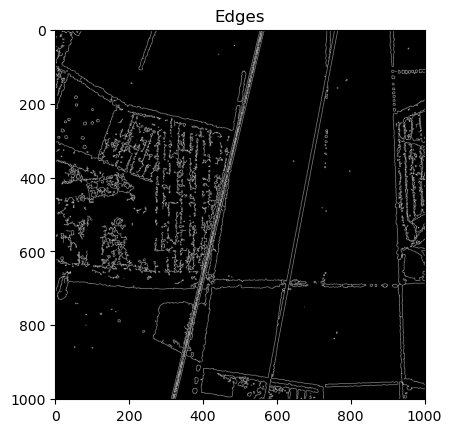

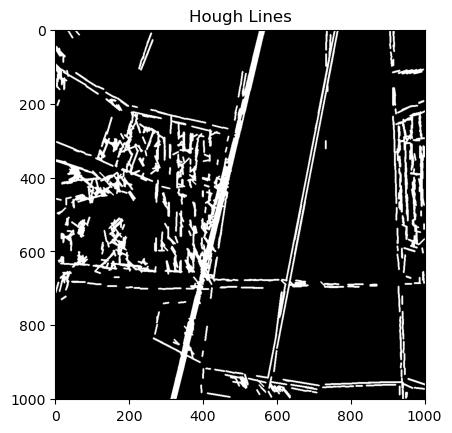

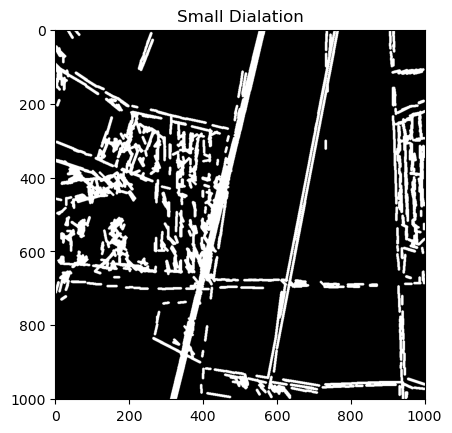

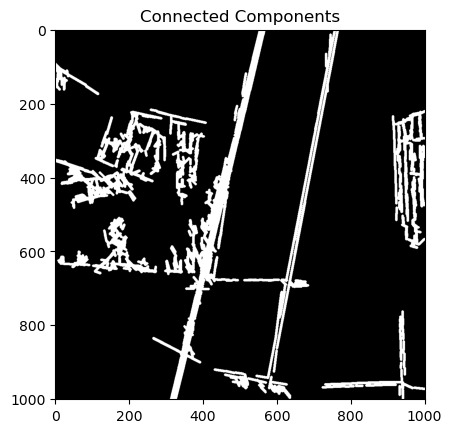

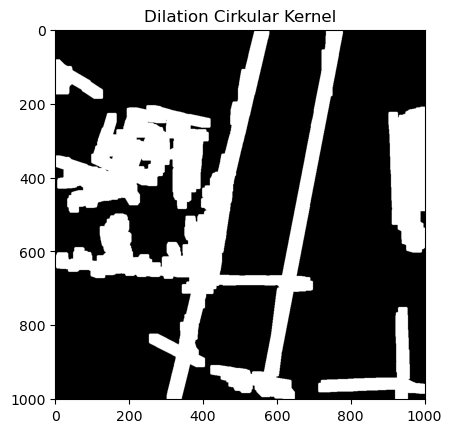

In [18]:
canny_lower = best_params['canny_lower']
canny_upper = best_params['canny_upper']
closing_kernel_size = best_params['closing_kernel_size']
hough_lines_treshold = 30#best_params['canny_lower']
max_line_gap = best_params['max_line_gap']
min_line_length = best_params['min_line_length']
meters_around_line = best_params['meters_around_line']
simplify_tolerance = best_params['simplify_tolerance']
cc_area = 1500#best_params['cc_area']


image = cv2.imread(os.path.expanduser('~')+'/data/TestData/data/ImagesGroundRemovedSmall/PUNKTSKY_00005_1km_6163_472_max.tif', cv2.IMREAD_UNCHANGED)
image = np.where(image >= 0, image, 0)
image = image/np.max(image)
image = (image*255).astype(np.uint8)

plt.title("Image")
plt.imshow(image, cmap='gray')
plt.show()

kernel = np.ones((closing_kernel_size,closing_kernel_size),np.uint8)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Apply edge detection method on the image
edges = cv2.Canny(closing, canny_lower, canny_upper, None, 3)

plt.title("Edges")
plt.imshow(edges, cmap='gray')
plt.show()

#Parameters for cv.HoughLinesP (image, lines, rho, theta, threshold, minLineLength = 0, maxLineGap = 0)
#image	8-bit, single-channel binary source image. The image may be modified by the function.
#lines	output vector of lines(cv.32SC4 type). Each line is represented by a 4-element vector (x1,y1,x2,y2) ,where (x1,y1) and (x2,y2) are the ending points of each detected line segment.
#rho	distance resolution of the accumulator in pixels.
#theta	angle resolution of the accumulator in radians.
#threshold	accumulator threshold parameter. Only those lines are returned that get enough votes
#minLineLength	minimum line length. Line segments shorter than that are rejected.
#maxLineGap	maximum allowed gap between points on the same line to link them.

linesP = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=hough_lines_treshold, # Min number of votes for valid line
            minLineLength=min_line_length, # Min allowed length of line
            maxLineGap=max_line_gap # Max allowed gap between line for joining them
            )

#lines_image = np.zeros_like(image)
lines_image = np.zeros_like(edges)

# Draw the lines
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(lines_image, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3)
        
plt.title("Hough Lines")
plt.imshow(lines_image, cmap='gray')
plt.show()

## Create kernel
kernel = np.ones((3, 3), np.uint8)
# Perform dilation with the cirkular kernel
lines_image = cv2.dilate(lines_image, kernel, iterations=1)

plt.title("Small Dialation")
plt.imshow(lines_image, cmap='gray')
plt.show()

(_, label_ids, bounding_box, _) = cv2.connectedComponentsWithStats(lines_image)
for i in range(len(bounding_box)):
    area = bounding_box[i][cv2.CC_STAT_AREA]
    if area < cc_area:
        lines_image[label_ids == i] = 0

plt.title("Connected Components")
plt.imshow(lines_image, cmap='gray')
plt.show()

# Pixels per kilometer
x_pixels, y_pixels = image.shape

# Pixels per meter
x_pixels, y_pixels = x_pixels/1000, y_pixels/1000

meters_around_line = 10
kernel_size = int(meters_around_line*np.ceil(x_pixels))

# Create kernel
circular_kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Create a cirkular kernel using (image, center_coordinates, radius, color, thickness)
cv2.circle(circular_kernel, (int(kernel_size/2), int(kernel_size/2)), int(kernel_size/2), 255, -1)

# Perform dilation with the cirkular kernel
dilation_cirkular_kernel = cv2.dilate(lines_image, circular_kernel, iterations=1)

plt.title("Dilation Cirkular Kernel")
plt.imshow(dilation_cirkular_kernel, cmap="gray")
plt.show()

In [19]:
# Create Polygons and Multi Polygons
mask = (dilation_cirkular_kernel == 255)
output = rasterio.features.shapes(dilation_cirkular_kernel, mask=mask, connectivity=4)
output_list = list(output)
print(len(output_list))

# Seperate the Multipolygons and Polygons
all_polygons = []
all_multi_polygons =[]

for multi_polygon in output_list:
    found_polygon = multi_polygon[0]['coordinates']
    # Then its just a Polygon
    if len(found_polygon) == 1:
        all_polygons.append(Polygon(found_polygon[0]))
    # Else its a multipolygon
    else:
        tmpMulti = []
        for p in found_polygon:
            tmpMulti.append(Polygon(p))
        all_multi_polygons.append(tmpMulti)


# Remove all low area multipolygons
for i, multi_pol in enumerate(all_multi_polygons):
    new_list = [multi_pol[0]]
    # No matter what, dont remove the first one
    for pol in multi_pol[1:]:
        if pol.area > 1000:
            new_list.append(pol)
    all_multi_polygons[i] = new_list

    
simplified_all_polygons = []
simplified_all_multi_polygons =[]
# Simplify all standard polygons
for p in all_polygons:
    simplified_all_polygons.append(shapely.simplify(p, tolerance=simplify_tolerance, preserve_topology=True))
simplified_all_polygons  = [p for p in simplified_all_polygons if not p.is_empty]

# Simplify all multi polygons
for multi_pol in all_multi_polygons:
    tmp = []
    for p in multi_pol:
        tmp.append(shapely.simplify(p, tolerance=simplify_tolerance, preserve_topology=True))
    tmp  = [p for p in tmp if not p.is_empty]
    simplified_all_multi_polygons.append(tmp)
    
# Create bounding box polygons
bbox_all_polygon_path = []
tmp = [p.bounds for p in simplified_all_polygons]
for values in tmp:
    #values = (minx, miny, maxx, maxy)
    x_min = values[0]
    x_max = values[2]
    y_min = values[1]
    y_max = values[3]
    bb = [(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min)]
    bbox_all_polygon_path.append(Path(bb))
    
# Create bounding box for multi polygons
bbox_all_multi_polygons_path = []
for multi_pol in simplified_all_multi_polygons:
    tmp = [p.bounds for p in multi_pol]
    tmp_multi_pol_boxes = []
    
    for values in tmp:
        #values = (minx, miny, maxx, maxy)
        x_min = values[0]
        x_max = values[2]
        y_min = values[1]
        y_max = values[3]
        bb = [(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min)]
        tmp_multi_pol_boxes.append(Path(bb))
    bbox_all_multi_polygons_path.append(tmp_multi_pol_boxes)


# Create Path polygons from the simplified shapely polygons
simplified_all_polygons_path = [Path(mapping(p)['coordinates'][0]) for p in simplified_all_polygons]
simplified_all_multi_polygons_path = []
for multi_pol in simplified_all_multi_polygons:
    tmp = [Path(mapping(p)['coordinates'][0]) for p in multi_pol]
    simplified_all_multi_polygons_path.append(tmp)

5


In [20]:
las = laspy.read(r'/home/frederik/data/TestData/data/LazFilesWithHeightParam/PUNKTSKY_00005_1km_6163_472_hag_nn.laz')

4095


In [21]:
# Pixels per kilometer
x_pixels, y_pixels = image.shape

def MaxMinNormalize(arr):
    return (arr - np.min(arr))/(np.max(arr)-np.min(arr))

def CastAllXValuesToImage(arr, x_pixels):
    return MaxMinNormalize(arr)*x_pixels

def CastAllYValuesToImage(arr, y_pixels):
    return (1-MaxMinNormalize(arr))*y_pixels

x_values = CastAllXValuesToImage(las.X, x_pixels)
y_values = CastAllYValuesToImage(las.Y, y_pixels)

# Format: [(1,1), (3,5), (1,5), ...] with 30 mio samples
list_zipped = np.array(list(zip(x_values, y_values)))

# Generate a bool list to obtain the final indexes from the dataset
indexes_needed = np.zeros(len(x_values), dtype=bool)

# Run through all polygons and check which points are inside the polygon
for i in range(len(simplified_all_polygons_path)):
    # Check if point is inside the bounding box
    indexes_inside_box = bbox_all_polygon_path[i].contains_points(list_zipped)
    indexes_inside_box = np.array([index for index, x in enumerate(indexes_inside_box) if x])
    
    # Generate small dataset
    tmp = list_zipped[indexes_inside_box]
    
    # Check if any of these points are in the polygon
    indexes_inside_polygon = simplified_all_polygons_path[i].contains_points(tmp)
    
    # Find the indexes from the box that is also inside the polygon
    final_indexes = indexes_inside_box[indexes_inside_polygon]
    
    # Update the indexes
    indexes_needed[final_indexes] = 1
    
for i in range(len(simplified_all_multi_polygons_path)):
    tmp_indexes_needed = np.zeros(len(x_values), dtype=bool)
    tmp_indexes_not_needed = np.zeros(len(x_values), dtype=bool)
    
    # Get the current bb multipolygon and the current simplified multipolygon
    bb_multi_pol = bbox_all_multi_polygons_path[i]
    simpli_multi_pol = simplified_all_multi_polygons_path[i]
    
    # Find the indexes that are inside the bounding box of the first element
    indexes_inside_box = bb_multi_pol[0].contains_points(list_zipped)
    indexes_inside_box = np.array([index for index, x in enumerate(indexes_inside_box) if x])
    
    # Generate smaller dataset
    tmp = list_zipped[indexes_inside_box]
    
    # Check if any of these points are in the polygon
    indexes_inside_polygon = simpli_multi_pol[0].contains_points(tmp)
    
    # Find the indexes from the box that is also inside the polygon
    final_indexes = indexes_inside_box[indexes_inside_polygon]
    tmp_indexes_needed[final_indexes] = 1
        
    for j in range(1, len(bb_multi_pol)):
        
        # Get the bounding box of the temp multi polygon
    
        indexes_inside_box = bb_multi_pol[j].contains_points(list_zipped)
        indexes_inside_box = np.array([index for index, x in enumerate(indexes_inside_box) if x])
        
        # Generate small dataset
        tmp = list_zipped[indexes_inside_box]
        
        # Check if any of these points are in the polygon
        indexes_inside_polygon = simpli_multi_pol[j].contains_points(tmp)
        final_indexes = indexes_inside_box[indexes_inside_polygon]
        
        # Update the indexes
        tmp_indexes_not_needed[final_indexes] = 1
    
    indexes_needed = indexes_needed | (tmp_indexes_needed & np.invert(tmp_indexes_not_needed))

In [58]:
# Visualise all data after removal of points
new_las = las[indexes_needed]
point_data = np.stack([new_las.X, new_las.Y, new_las.Z], axis=0).transpose((1, 0))

In [41]:


geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(point_data)
o3d.visualization.draw_geometries([geom])

In [25]:
print(np.sum(las.classification == 14))
print(np.sum(new_las.classification == 14))

60018
59940


In [23]:
len(las[indexes_needed])

11254519

In [26]:
len(las)

30053691

In [85]:


clf = LocalOutlierFactor(n_neighbors=5, contamination=0.00001, novelty=True, n_jobs=3)
clf.fit(point_data)




LocalOutlierFactor(contamination=1e-05, n_jobs=3, n_neighbors=5, novelty=True)

In [31]:
point_data[0]

array([ 47255503, 616397383,      3027], dtype=int32)

In [36]:
new_las[0].X, new_las[0].Y, new_las[0].Z

(47255503, 616397383, 3027)

In [80]:
# Visualise all data after removal of points
#new_las = las[indexes_needed]
#point_data = np.stack([new_las.X, new_las.Y, new_las.Z], axis=0).transpose((1, 0))

geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(point_data[preds == 1])
o3d.visualization.draw_geometries([geom])

In [74]:
np.sum(new_las[preds == 1].classification == 14)

59940

In [75]:
np.min(clf.negative_outlier_factor_[new_las.classification == 14])

-4.299446259164491

In [77]:
len(new_las[preds == 1])

11254406

In [78]:
len(new_las)

11254519

In [86]:
preds = clf.predict(point_data)

In [89]:
geom = o3d.geometry.PointCloud()
geom.points = o3d.utility.Vector3dVector(point_data[preds == 1])
o3d.visualization.draw_geometries([geom])

In [90]:
np.sum(new_las[preds == 1].classification == 14)

59940

In [9]:
df

,file,filepath,pct_kept_datapoints,pct_lost_powerline,params
0,0,/home/nxw500/data/new_las/PUNKTSKY_00005_1km_6...,0.000100143684416798,0.0,"{'contamination': 0.05309646339879825, 'n_neig..."
1,1,/home/nxw500/data/new_las/PUNKTSKY_00005_1km_6...,0.00010007839752002035,6.309148264982412e-05,"{'contamination': 0.05309646339879825, 'n_neig..."
2,0,/home/nxw500/data/new_las/PUNKTSKY_00005_1km_6...,0.000100143684416798,0.0,"{'contamination': 0.025837240360108617, 'n_nei..."
3,1,/home/nxw500/data/new_las/PUNKTSKY_00005_1km_6...,0.00010007839752002035,6.309148264982412e-05,"{'contamination': 0.025837240360108617, 'n_nei..."
4,0,/home/nxw500/data/new_las/PUNKTSKY_00005_1km_6...,0.000100143684416798,0.0,"{'contamination': 0.05286922133837089, 'n_neig..."
...,...,...,...,...,...
95,1,/home/nxw500/data/new_las/PUNKTSKY_00005_1km_6...,0.00010007839752002035,6.309148264982412e-05,"{'contamination': 1.0000000000004337e-07, 'n_n..."
96,0,/home/nxw500/data/new_las/PUNKTSKY_00005_1km_6...,0.000100143684416798,0.0,"{'contamination': 0.09932716634202095, 'n_neig..."
97,1,/home/nxw500/data/new_las/PUNKTSKY_00005_1km_6...,0.00010007839752002035,6.309148264982412e-05,"{'contamination': 0.09932716634202095, 'n_neig..."
98,0,/home/nxw500/data/new_las/PUNKTSKY_00005_1km_6...,0.000100143684416798,0.0,"{'contamination': 0.09950459313056649, 'n_neig..."
